# Arvore de decisão ID3 Wine data
##### Higor Cavalcante dos Anjos

## Instalando biblioteca que comtem o ID3 para criar a arvore de decisao

In [ ]:
!pip install decision-tree-id3

## Bibliotecas utilizadas

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from id3 import Id3Estimator
from id3 import export_graphviz
import numpy as np

from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

## Importando dados a serem utilizados

In [ ]:
# Pegando arquivo CSV do meu GitHub
url = 'https://raw.githubusercontent.com/HigorAnjos/IAdataSet/main/WineQT.csv'
urlretrieve(url, '/content/data')

('/content/data', <http.client.HTTPMessage at 0x7eff99322890>)

In [ ]:
#Faz leitura do Arquivo com as informações para montar a árvore
wineData = pd.read_csv('/content/data')

In [ ]:
# Dados ja tratados
wineData
# wineData.head() Primerios registros
# wineData.head(10) 10 Primerios registros
# wineData.tail() Utimos registros
# wineData.tail(10) 10 Utimos registros

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
wineData.describe() # contagem, media, desvio padrao, minimos, ..., maximo

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Visualizacao dos dados

In [ ]:
# Valores unicos de um determinado atributo, no caso quality
np.unique(wineData['quality'])

array([3, 4, 5, 6, 7, 8])

In [ ]:
# Valores unicos de um determinado atributo, no caso quality + Quantidade
np.unique(wineData['quality'], return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  6,  33, 483, 462, 143,  16]))

### Grafico quality

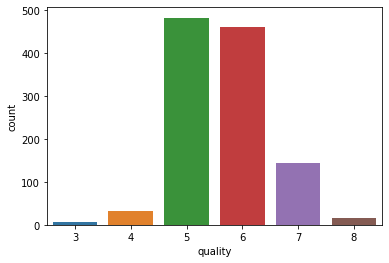

In [ ]:
sns.countplot(x = wineData['quality']);

## Separa os dados em classe e previsores

In [ ]:
#Separa os dados que serão os previsõres
previsores = wineData.iloc[:,0:10].values

#Separa os dado que vai ser a classe
classe = wineData.iloc[:,11].values

#Pegar o nome dos previsores
colunas = np.asarray(wineData.columns[0:11])


In [ ]:
classe

array([5, 5, 5, ..., 5, 6, 5])

In [ ]:
previsores

array([[7.4    , 0.7    , 0.     , ..., 0.9978 , 3.51   , 0.56   ],
       [7.8    , 0.88   , 0.     , ..., 0.9968 , 3.2    , 0.68   ],
       [7.8    , 0.76   , 0.04   , ..., 0.997  , 3.26   , 0.65   ],
       ...,
       [6.2    , 0.6    , 0.08   , ..., 0.9949 , 3.45   , 0.58   ],
       [5.9    , 0.55   , 0.1    , ..., 0.99512, 3.52   , 0.76   ],
       [5.9    , 0.645  , 0.12   , ..., 0.99547, 3.57   , 0.71   ]])

In [ ]:
colunas

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

## Treina a árvore e exporta o resultado

In [ ]:
estimator = Id3Estimator()
estimator.fit(previsores, classe)
t = export_graphviz(estimator.tree_, 'treeWineData.dot', colunas)

# Arquivo treeWineData.dot criado ao lado, na pastinha do menu, baixar
# Para ver a imagem da árvore copia o texto do arquivo neste site:
# https://dreampuf.github.io/GraphvizOnline/